<a href="https://colab.research.google.com/github/tccnchsu/PDE/blob/main/%E3%80%8CPoisson_solver_2D_for_source_being_gaussion_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Poisson-solver-2D for source being gaussion**

## univariate Gaussian
Recall the PDF of a univariate Gaussian
$$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left ({-\frac{1}{2}\left (\frac{x - \mu}{\sigma} \right )^2} \right )$$

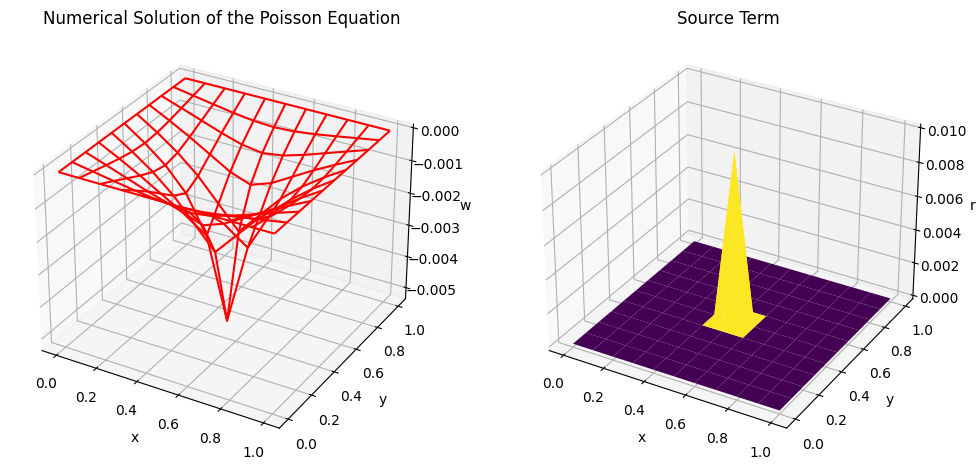

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Grid parameters
N = 10
h = 1 / N
x = np.linspace(0, 1, N + 1)
y = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(x, y)

# Boundary conditions
b_bottom_top = np.sin(2 * np.pi * x)
b_left_right = 2 * np.sin(2 * np.pi * y)

# Source term
sigma_x = 0.01
sigma_y = 0.01
x0 = 0.5
y0 = 0.5
r = h**2 * np.exp(-((X - x0)**2 / (2 * sigma_x**2) + (Y - y0)**2 / (2 * sigma_y**2)))

# Solve Poisson equation using finite difference method
w = np.zeros((N + 1, N + 1))
for _ in range(1000):
    for i in range(1, N):
        for j in range(1, N):
            w[i, j] = (w[i + 1, j] + w[i - 1, j] + w[i, j + 1] + w[i, j - 1] - r[i, j]) / 4

# Plot the solution and the source term
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, w, color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('w')
ax1.set_title('Numerical Solution of the Poisson Equation')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, r, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('r')
ax2.set_title('Source Term')
plt.show()
